<a href="https://colab.research.google.com/github/hyetae/2023-graduate/blob/main/preprocessing/Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Bounding Box

In [ ]:
def bound_box(img):

  RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(RGB, cv2.COLOR_RGB2GRAY)
  res, thr = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)
  contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  img_copy = img.copy()
  for i in range(len(contours[1:])):
    cnt = contours[i]
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0,0,255), 3)

  return img_copy

#morphology

Raw image


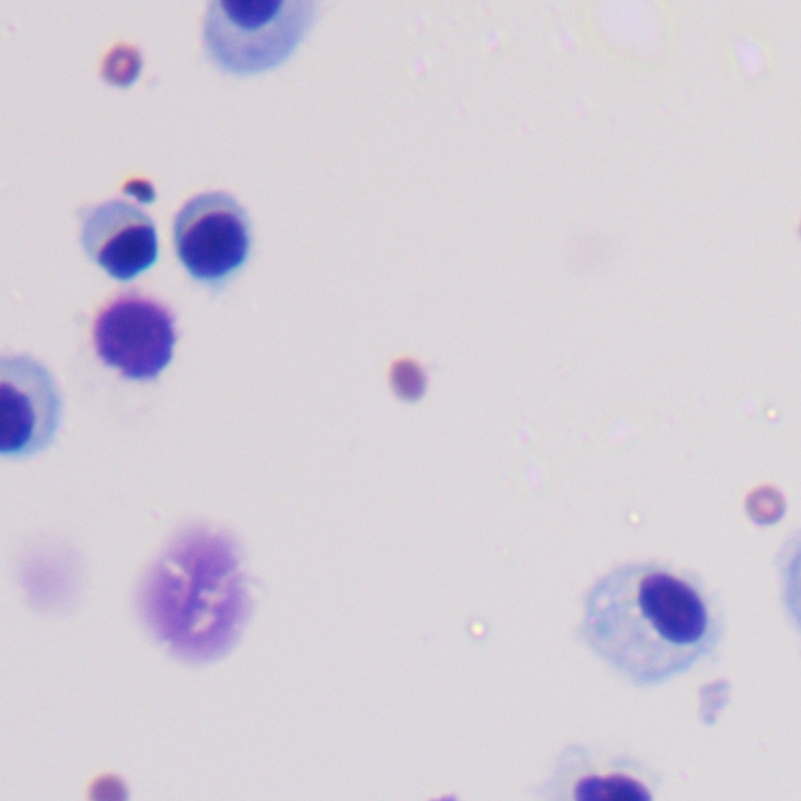

In [ ]:
#raw
cropped = cv2.imread('/content/drive/MyDrive/cell-data/cropped.jpeg')

print("Raw image")
cv2_imshow(cropped)

##erosion

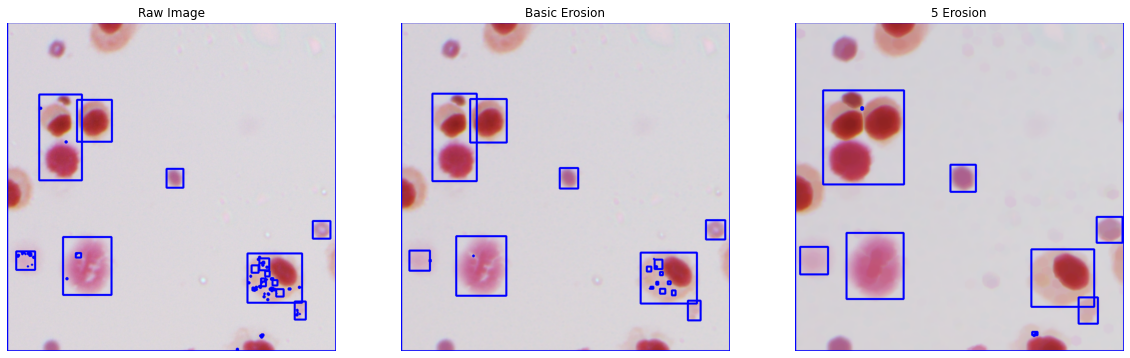

In [ ]:
#raw
raw = bound_box(cropped)

#basic erosion
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
erosion = cv2.erode(cropped,kernel,iterations=1)
erosion = bound_box(erosion)

#5 iterations
erosion5 = cv2.erode(cropped,kernel,iterations=5)
erosion5 = bound_box(erosion5)

#print
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Raw Image")
plt.imshow(raw)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Basic Erosion")
plt.imshow(erosion)
plt.axis("off")
plt.subplot(1,3,3)
plt.title("5 Erosion")
plt.imshow(erosion5)
plt.axis("off")
plt.show()

##dilation

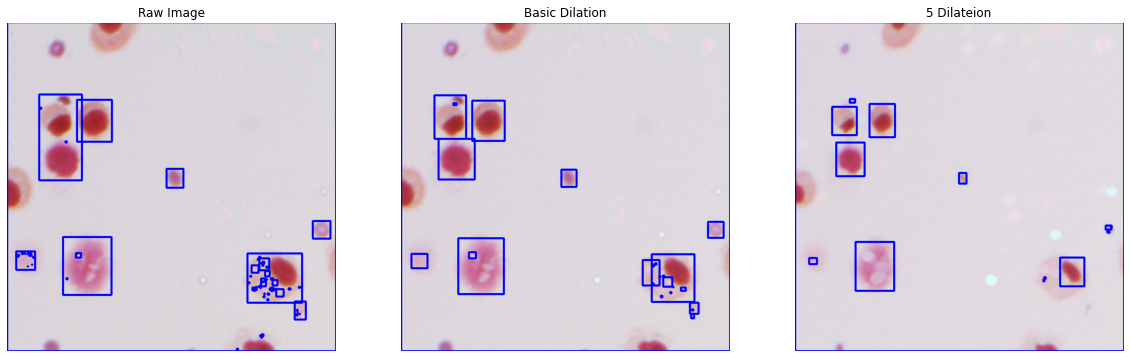

In [ ]:
#basic dilation
dilation = cv2.dilate(cropped,kernel,iterations=1)
dilation = bound_box(dilation)

#5 iterations
dilation5 = cv2.dilate(cropped,kernel,iterations=5)
dilation5 = bound_box(dilation5)

#print
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Raw Image")
plt.imshow(raw)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Basic Dilation")
plt.imshow(dilation)
plt.axis("off")
plt.subplot(1,3,3)
plt.title("5 Dilateion")
plt.imshow(dilation5)
plt.axis("off")
plt.show()

##open, close, open & close

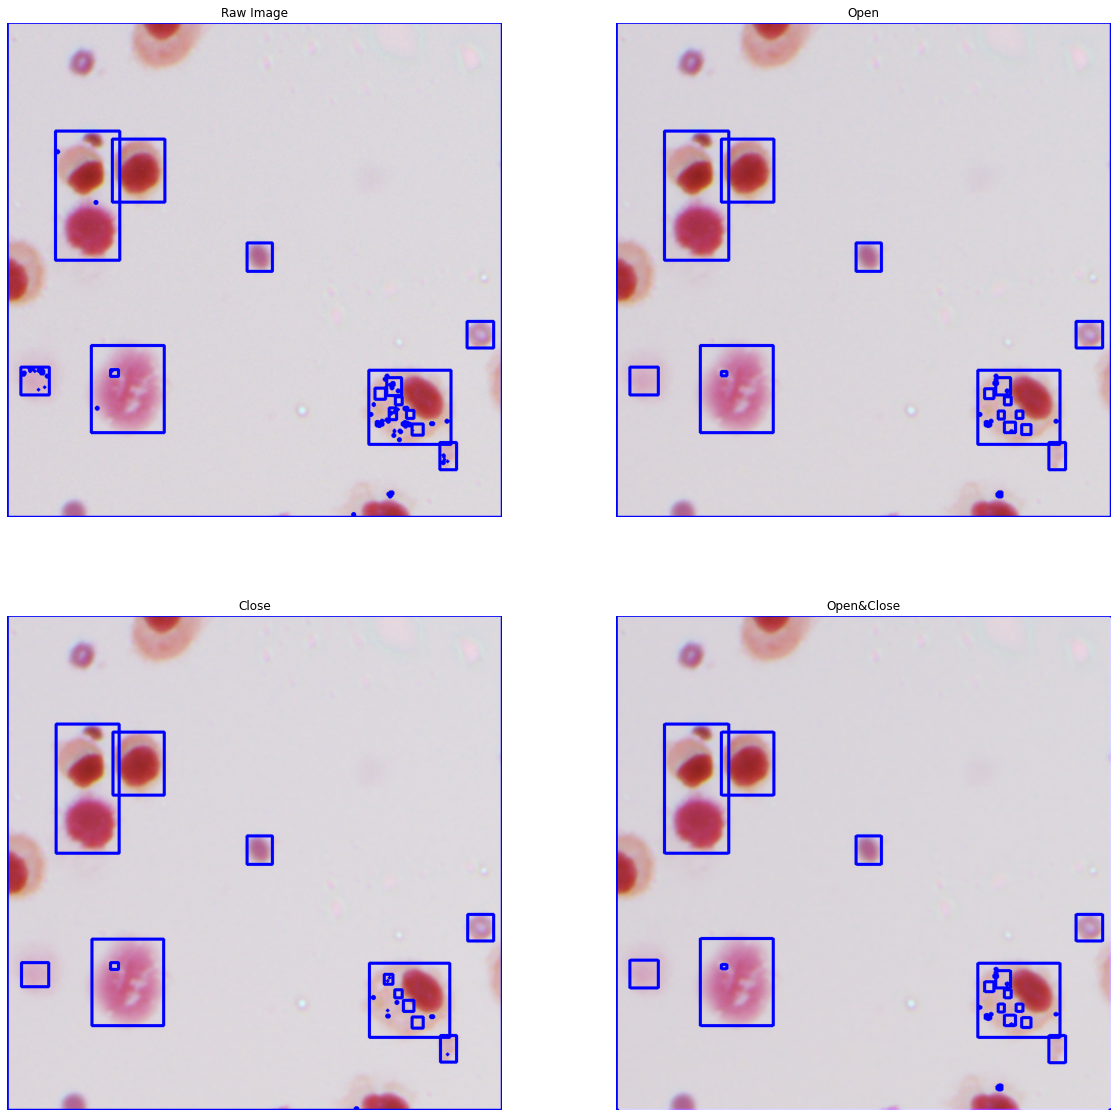

In [ ]:
#open
open = cv2.morphologyEx(cropped, cv2.MORPH_OPEN, kernel)
open = bound_box(open)

#close
close = cv2.morphologyEx(cropped, cv2.MORPH_CLOSE, kernel)
close = bound_box(close)

#open&close
opcl = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel)

#print
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.title("Raw Image")
plt.imshow(raw)
plt.axis("off")
plt.subplot(2,2,2)
plt.title("Open")
plt.imshow(open)
plt.axis("off")
plt.subplot(2,2,3)
plt.title("Close")
plt.imshow(close)
plt.axis("off")
plt.subplot(2,2,4)
plt.title("Open&Close")
plt.imshow(opcl)
plt.axis("off")
plt.show()